## Algerian Forest Fires Dataset - Data Analysis and Regression Model Building

* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Model Building
* Model Predictions

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("D:\DATA SCIENCE\FSDS - May 22\EDA\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

## Exploratory Data Analysis

Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [3]:
# Display records of the data
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df[0:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [5]:
# Removing Unnecessary Rows From Dataset
df.drop([122,123],inplace = True,axis=0)

In [6]:
df[0:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [7]:
df=df.reset_index(drop=True)

In [8]:
df[0:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [9]:
# Creating new feature region
df.loc[:122,'region']='Bejaia'
df.loc[122:,'region']='Sidi-Bel Abbes'

In [10]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,Bejaia
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,Bejaia
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,Bejaia
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia


In [11]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi-Bel Abbes
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi-Bel Abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [12]:
# Number of rows and columns
df.shape

(244, 15)

In [13]:
df1 = df.copy()

In [14]:
# Display first five records of data
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [15]:
# Display last five records of data
df1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [16]:
df1.shape

(244, 15)

In [17]:
# info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [18]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [19]:
df1.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [20]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

## Changing The DataTypes of the Columns

In [21]:
df1['day'] = df1['day'].astype('int64')
df1['month'] = df1['month'].astype('int64')
df1['year'] = df1['year'].astype('int64')
df1['Temperature'] = df1['Temperature'].astype('int64')
df1['RH'] = df1['RH'].astype('int64')
df1['Ws'] = df1['Ws'].astype('int64')
df1['Rain'] = df1['Rain'].astype('float64')
df1['FFMC'] = df1['FFMC'].astype('float64')
df1['DMC'] = df1['DMC'].astype('float64')
df1['ISI'] = df1['ISI'].astype('float64')
df1['BUI'] = df1['BUI'].astype('float64')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [23]:
# Removing string from the column
df1.index[df1['DC']=='14.6 9']

Int64Index([165], dtype='int64')

In [24]:
df1.loc[165,'DC']=14.6

In [25]:
df1[165:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN,Sidi-Bel Abbes
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,Sidi-Bel Abbes
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,Sidi-Bel Abbes
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,Sidi-Bel Abbes
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,fire,Sidi-Bel Abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [26]:
df1.loc[165,'FWI']=df1['FWI'].mode()[0]

In [27]:
df1[165:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,0.4,NaN,Sidi-Bel Abbes
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,Sidi-Bel Abbes
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,Sidi-Bel Abbes
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,Sidi-Bel Abbes
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,fire,Sidi-Bel Abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [28]:
df1['DC'] = df1['DC'].astype('float64')
df1['FWI'] = df1['FWI'].astype('float64')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [30]:
# # Statistical Summary
df1.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,Bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,122
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.008197,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.437383,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN,NaN


## Check for missing data

In [31]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

We have one missing value in Classes feature that we will handle later on.

In [33]:
# Dropping unnecessary columns
df1.drop(['day','month','year'],axis=1,inplace=True)

In [34]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [35]:
# Checking correlation between features
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558800
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.570483
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.029001
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322810
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686342
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874924
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740178
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.908054
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857847
FWI,0.558800,-0.570483,0.029001,-0.322810,0.686342,0.874924,0.740178,0.908054,0.857847,1.000000


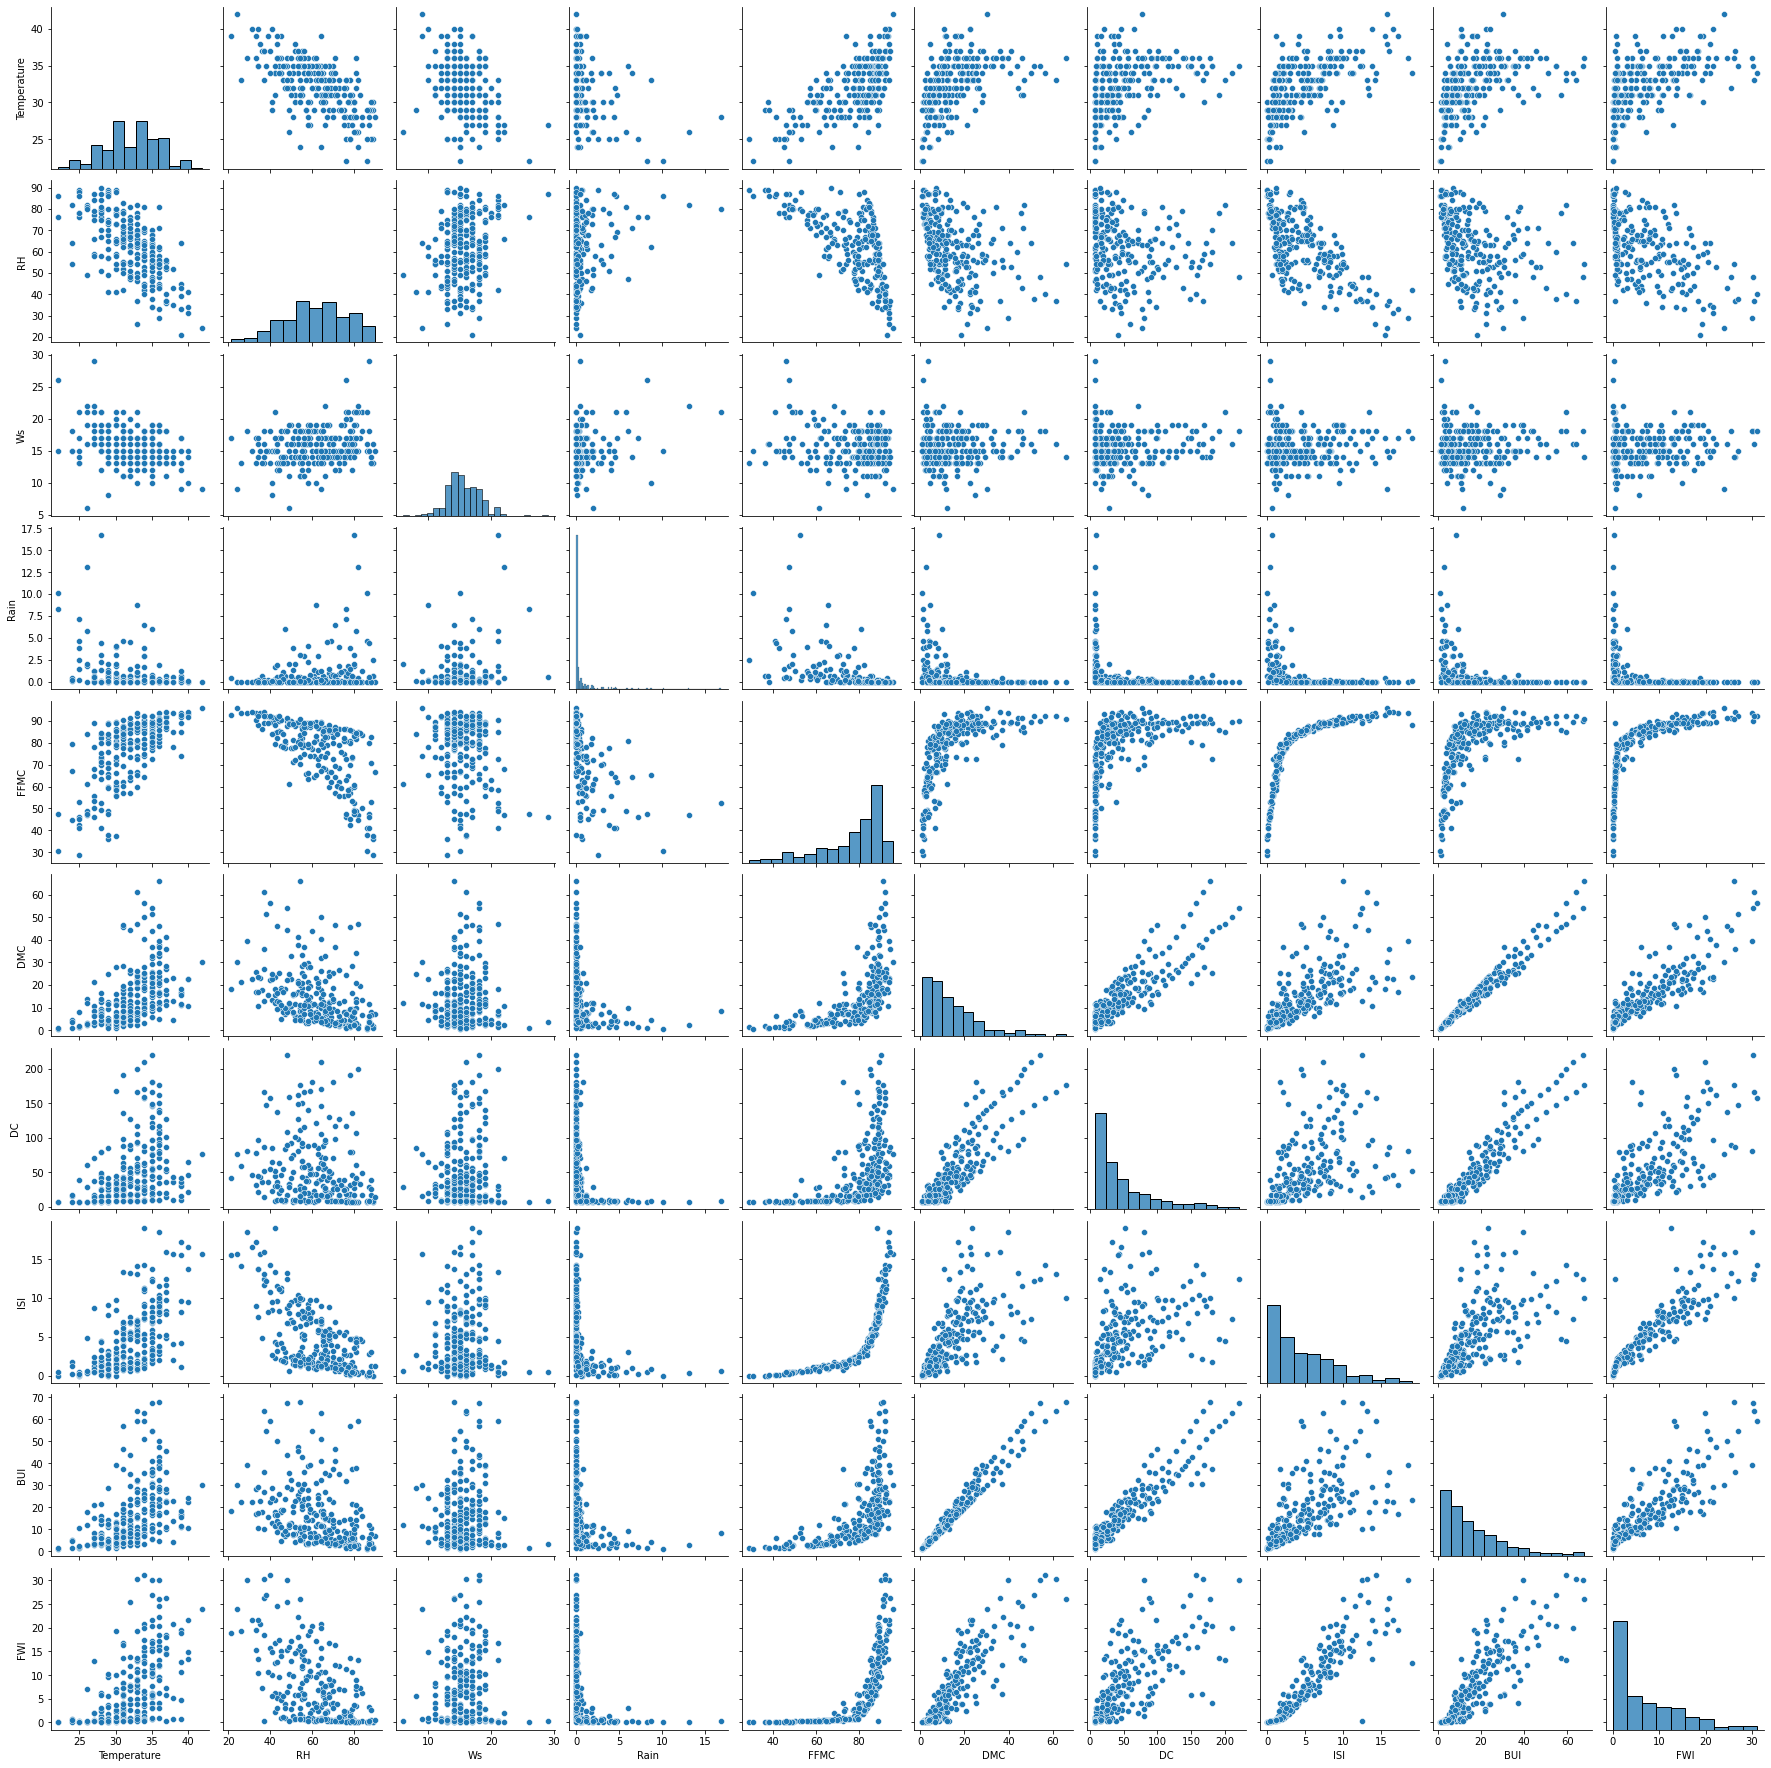

In [36]:
sns.pairplot(df1)

## Correlation using Heatmap

<AxesSubplot:>

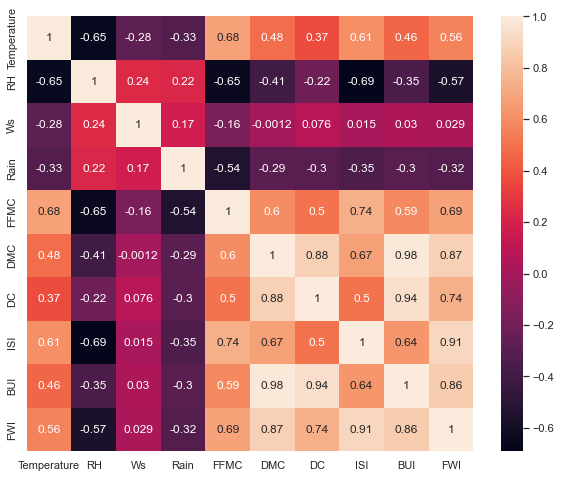

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df1.corr(),annot=True)

### Observations:
* We can see DMC and BUI have high positive correlation.
* DC and BUI have high positive correlation.
* RH and Temp, RH and FFMC, RH and ISI have negative correlation.

In [40]:
# Separating numerical and categorical features
num_feat = [i for i in df1.columns if df1[i].dtype!='O']
cat_feat = [i for i in df1.columns if df1[i].dtype=='O']

In [41]:
num_feat

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [42]:
cat_feat

['Classes', 'region']

## Univariate Analysis

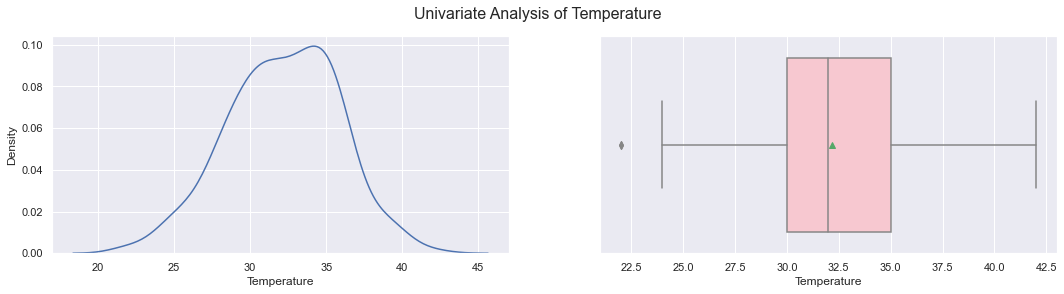

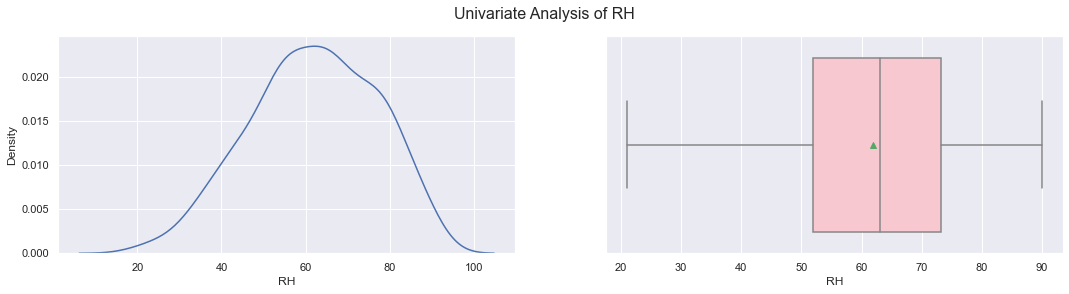

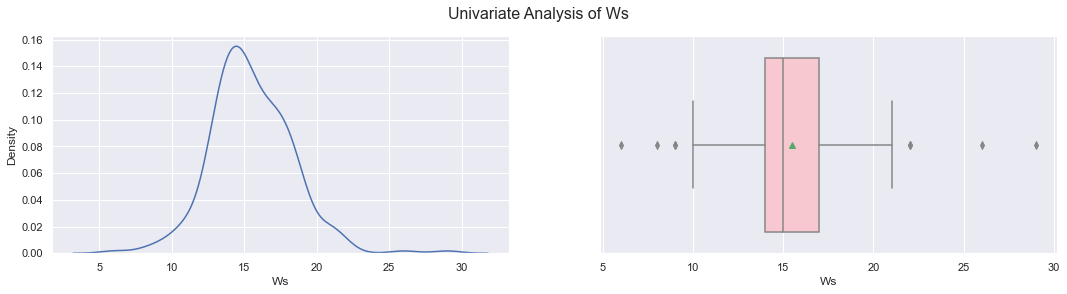

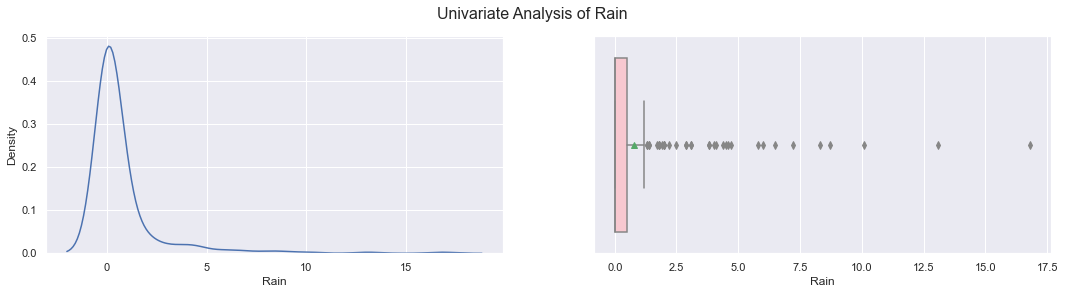

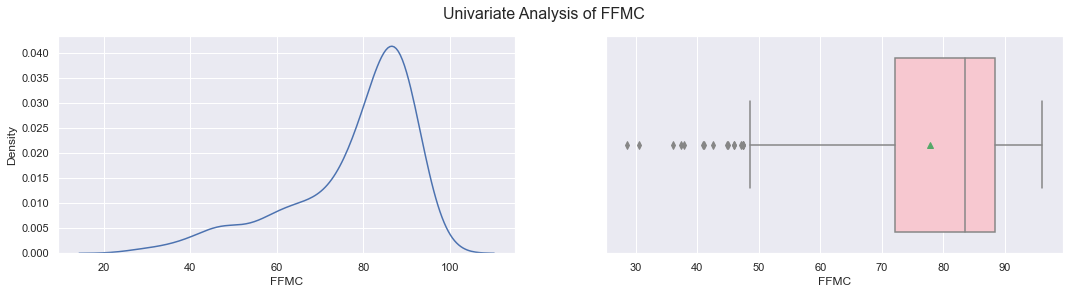

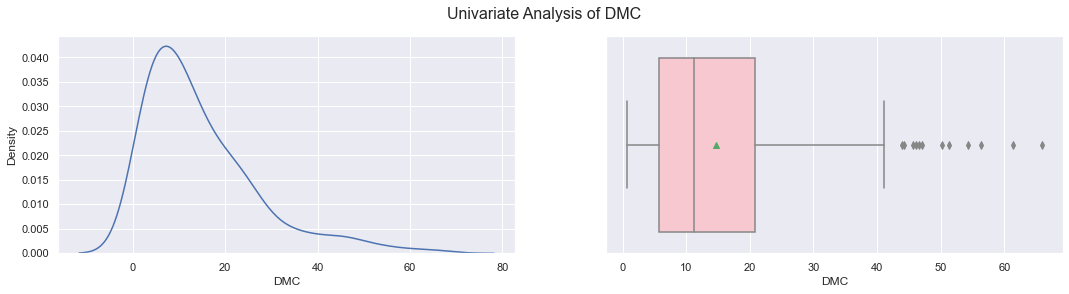

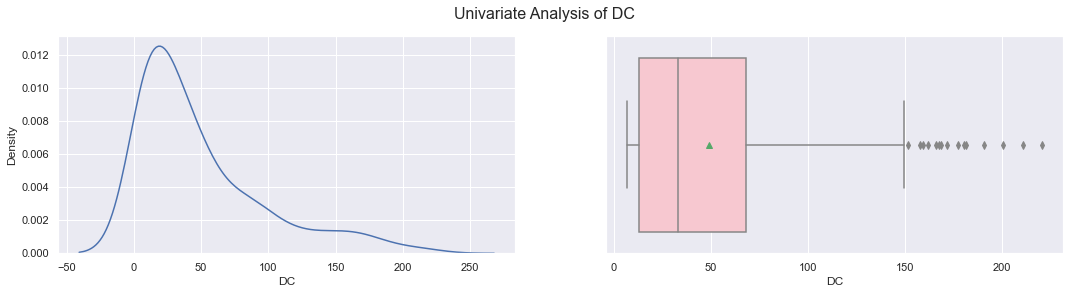

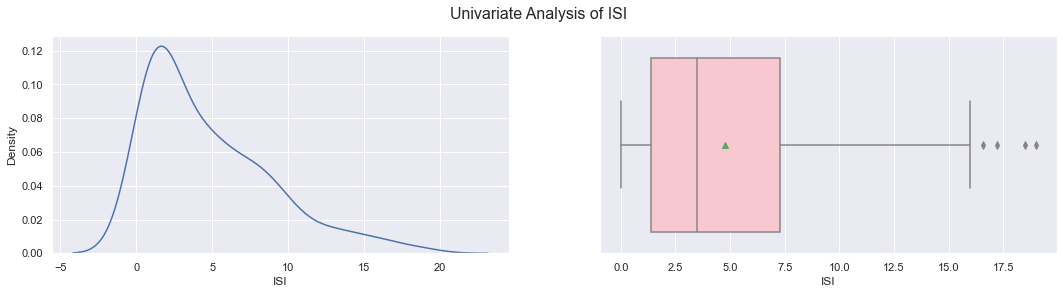

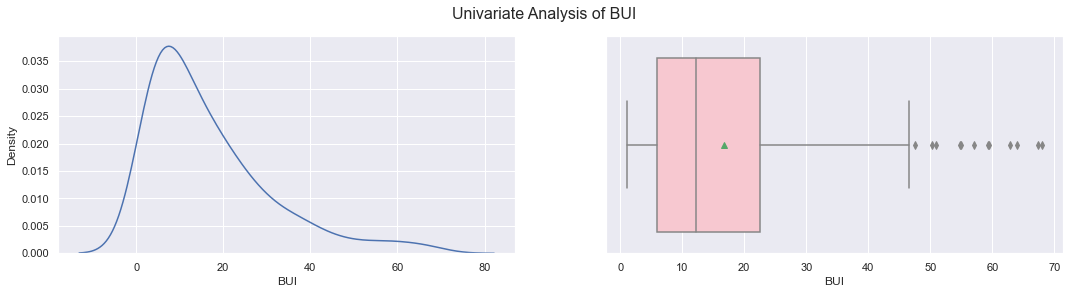

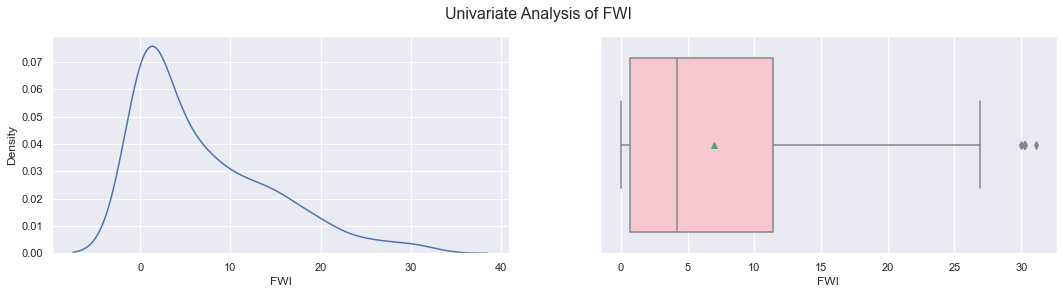

In [43]:
x_axis = num_feat
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df1[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(df1[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

### Observations:
* Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8
* (FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5
* (DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9
* (DC) Drought Code index from the FWI system: 7 to 220.4
* (ISI) Initial Spread Index from the FWI system: 0 to 18.5
* (BUI) Buildup Index from the FWI system: 1.1 to 68
* (FWI) Fire Weather Index: 0 to 31.1
* We can also see outliers in most of these features.

In [44]:
df1['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [45]:
df1['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [46]:
df1['Classes'] = df1['Classes'].str.strip()

In [47]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

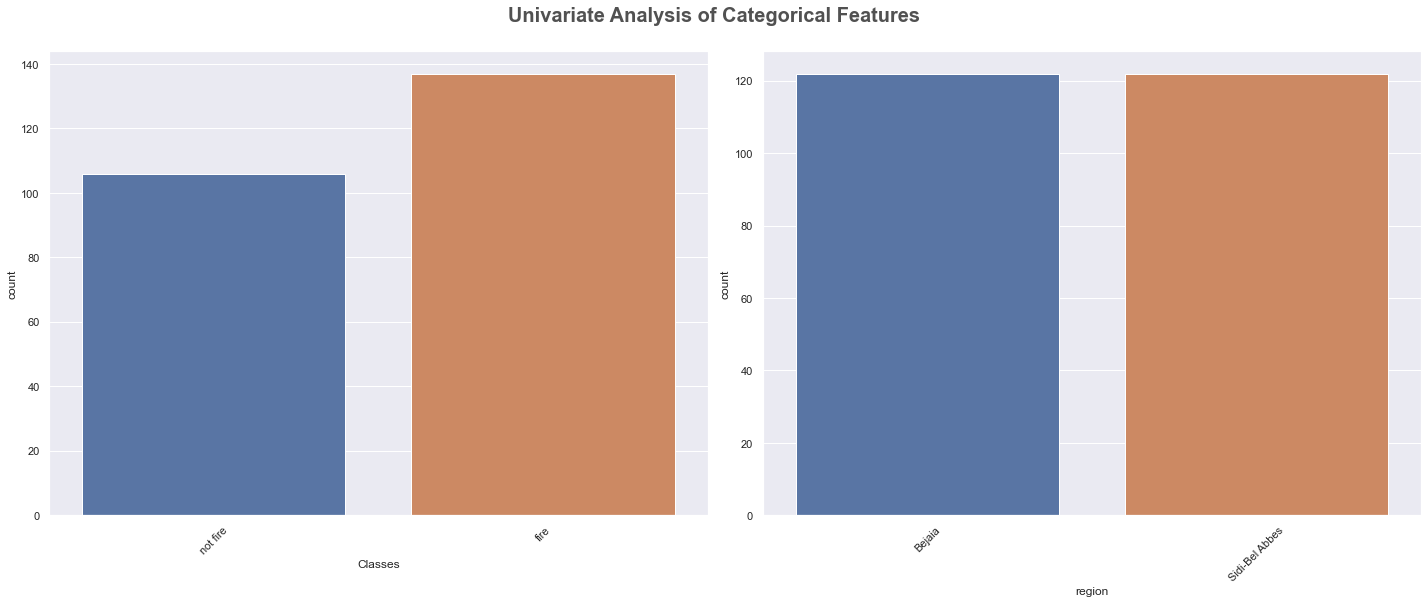

In [48]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_feat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df1[cat_feat[i]])
    plt.xlabel(cat_feat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Bi variate Analysis

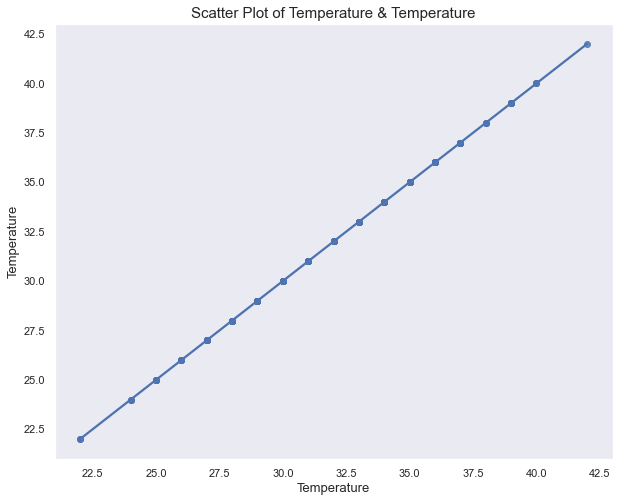

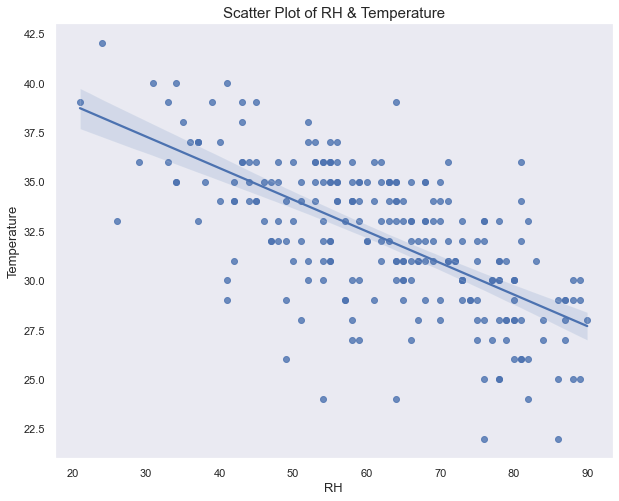

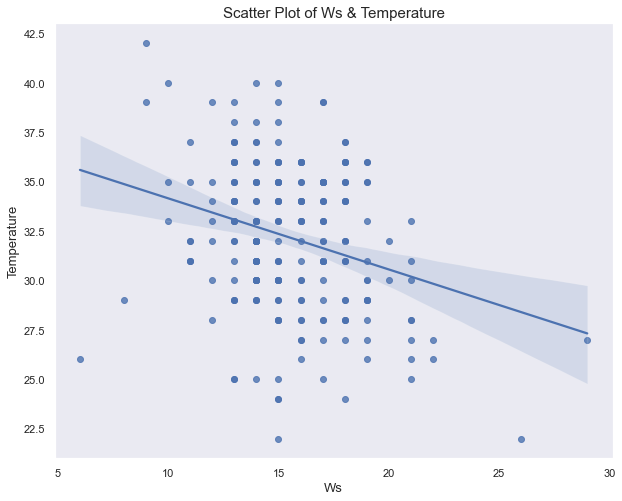

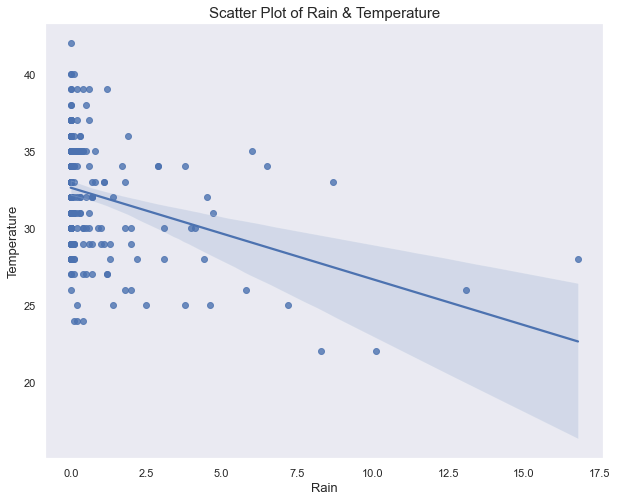

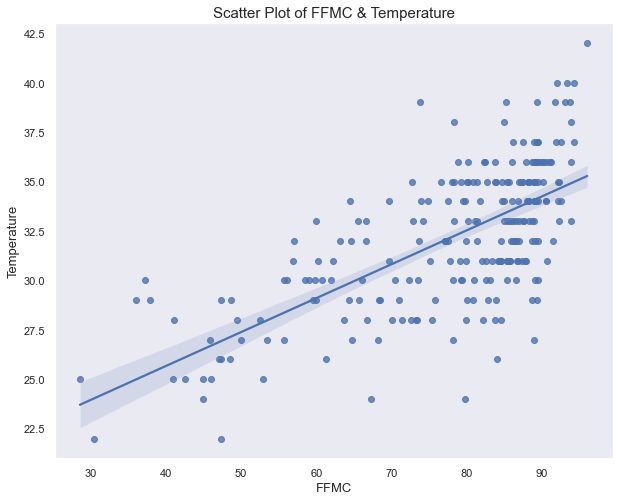

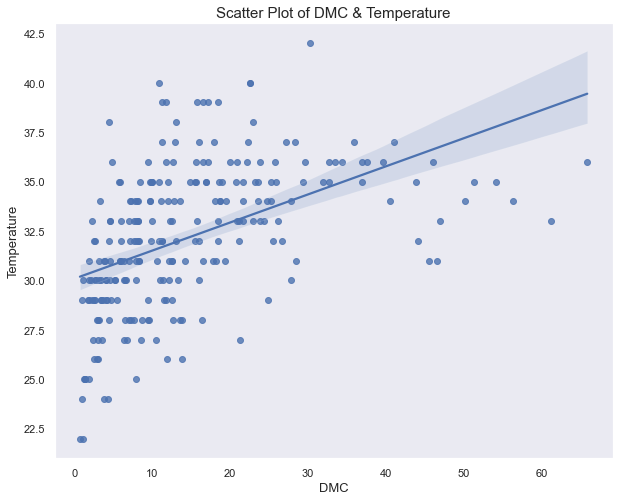

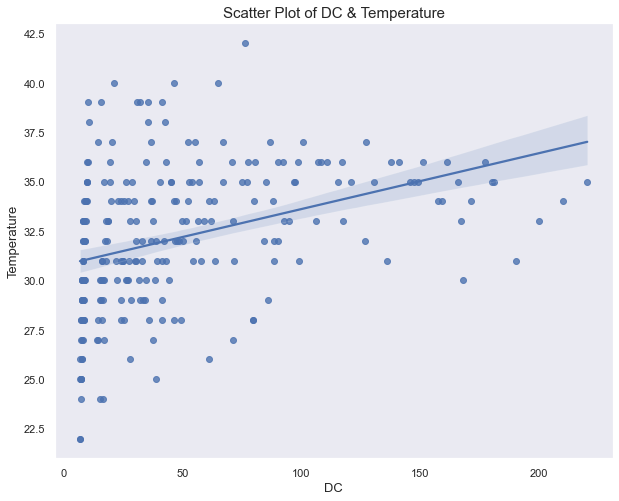

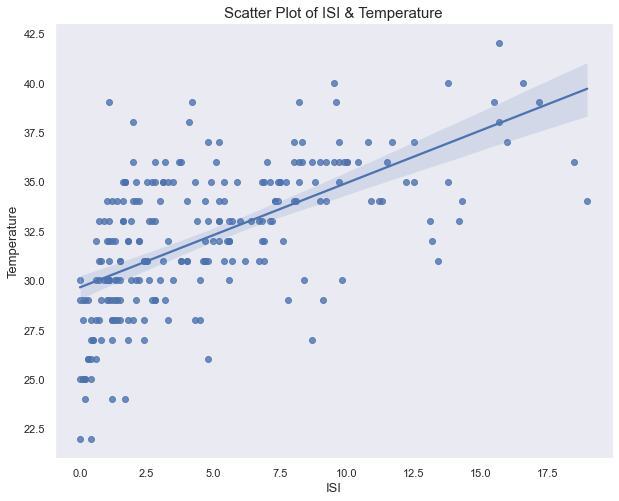

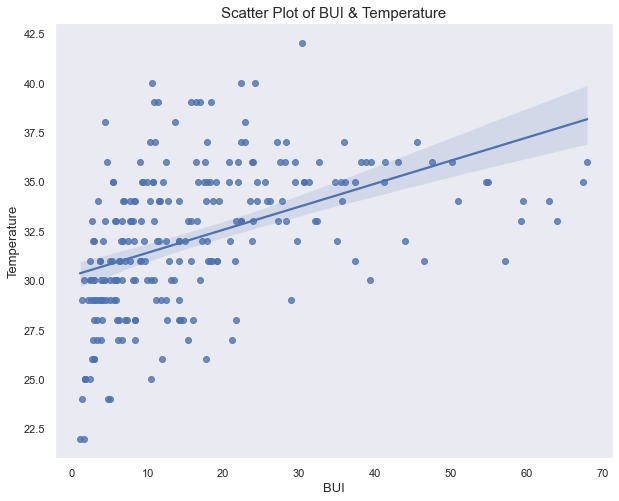

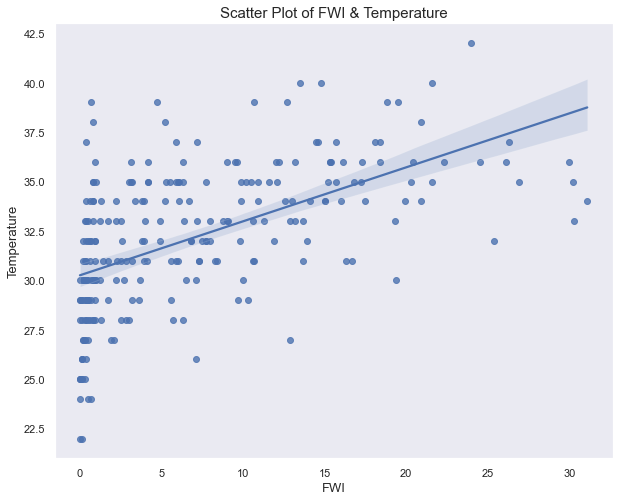

In [49]:
x_axis = num_feat
y = "Temperature"

for col in x_axis:
    sns.regplot(x = col, y = y, data = df1)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

### Observations:
As we are considering Temperature as our dependent feature we are checking relation of each feature with it.
* RH shows negative correlation with Temperature as increase in RH reduces the Temperature.
* WS too shows negative correlation with Temperature but not as strong as RH.
* FFMC shows strong positive correlation as Temperature increases with FFMC which is clearly seen from the plot.
* ISI shows positive correlation with Temperature.

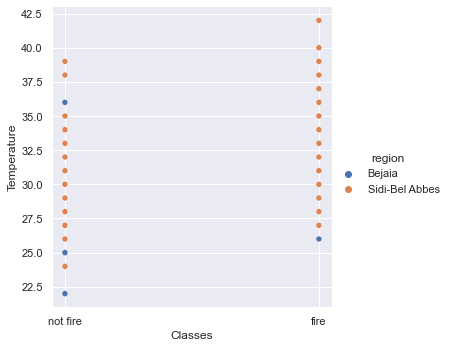

In [53]:
sns.relplot(df1['Classes'],df1['Temperature'],hue=df1['region'])

* Sidi-Bel-Abbes Region has high Temperature as compared to Bejaia Region

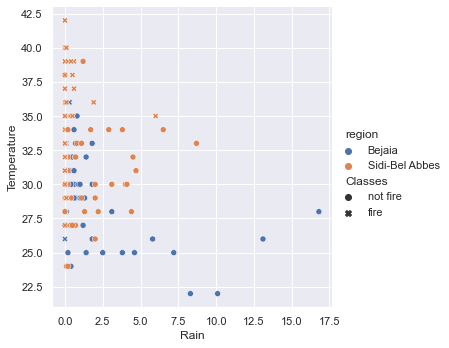

In [55]:
sns.relplot(df1['Rain'],df1['Temperature'],hue=df1['region'],style=df1['Classes'])

* Due to less rains in Sidi-Bel-Abbes Region we can see more fire in that region most of the time.

In [56]:
# Drop the Duplicates
df1[df1.duplicated()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [59]:
#What is the highest temperature in the dataset
df1.Temperature.max()

42

In [60]:
#What is the lowest temperature in the dataset
df1.Temperature.min()

22

In [61]:
df1.sort_values(by='Rain', ascending=False)[['Rain','region']].head(1)

,Rain,region
91,16.8,Bejaia


In [62]:
df1.sort_values(by='Rain', ascending=True)[['Rain','region']].head(1)

,Rain,region
0,0.0,Bejaia


* Lowest and Highest rains are recorded from the Bejaia region.

## Handling the missing value

In [63]:
df1.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [65]:
df1['Classes']=df1['Classes'].fillna(df1['Classes'].mode()[0])

In [66]:
df1.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

## Handling Categorical Features

In [67]:
df1['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [68]:
df1['Classes']=df1['Classes'].map({'not fire':0,'fire':1})

In [69]:
df1['region'].unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [70]:
df1['region']=df1['region'].map({'Bejaia':0,'Sidi-Bel Abbes':1})

In [71]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


## Split the data into X & y

In [72]:
# Independent and Dependent Features
X=df1.drop(['Temperature'],axis=1)
y=df1['Temperature']

In [73]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [74]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

## Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 42)

In [77]:
X_train.shape , y_train.shape

((170, 11), (170,))

In [78]:
X_test.shape, y_test.shape

((74, 11), (74,))

## Standardize or feature scaling the dataset

In [79]:
# Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [82]:
X_train

array([[-1.94944205,  0.57272408, -0.38492678, ...,  2.01522112,
         0.93173594,  0.98830369],
       [ 1.24498821, -0.18496536, -0.38492678, ..., -0.15443661,
         0.93173594,  0.98830369],
       [-0.25027701,  0.19387936, -0.38492678, ...,  0.55513699,
         0.93173594,  0.98830369],
       ...,
       [ 0.90515521,  0.57272408,  2.89606475, ..., -0.91859279,
        -1.07326545, -1.01183473],
       [-0.38621022,  0.19387936, -0.38492678, ...,  0.29586971,
         0.93173594,  0.98830369],
       [ 0.97312181,  2.08810297,  0.4353211 , ..., -0.89130149,
        -1.07326545, -1.01183473]])

In [83]:
X_test

array([[ 8.95559923e-02, -1.84965365e-01, -3.84926784e-01,
         6.55802741e-01, -3.45759694e-02,  3.00646149e-01,
         2.58796614e-01,  1.17073226e-01,  2.13995838e-01,
         9.31735943e-01, -1.01183473e+00],
       [-5.90110020e-01, -9.42654810e-01, -3.84926784e-01,
         7.59299274e-01, -3.78922477e-01, -3.82486968e-01,
         4.26809691e-01, -3.97525370e-01,  5.02480850e-02,
         9.31735943e-01, -1.01183473e+00],
       [-9.97909628e-01,  1.93879358e-01, -3.84926784e-01,
         7.17900661e-01, -5.39083644e-01, -6.43021220e-01,
         5.22817163e-01, -6.13100458e-01, -5.89170837e-02,
         9.31735943e-01,  9.88303691e-01],
       [-6.58076622e-01,  5.72724081e-01, -1.57080150e-01,
         2.07317762e-01,  4.85947821e-01,  2.05258513e+00,
        -4.61259431e-01,  9.72419541e-01, -1.27145314e-01,
         9.31735943e-01,  9.88303691e-01],
       [-1.47367584e+00, -2.07918898e+00, -3.39357457e-01,
         1.02149049e+00,  6.38100929e-01,  3.27315009e-01,
  

## Model Training

### Model 1: Using Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression=LinearRegression()

In [86]:
regression.fit(X_train,y_train)

LinearRegression()

In [87]:
# print the coefficients and the intercept
print(regression.coef_)

[-1.12921983 -0.46320251  0.10763292  1.72907775  1.1021048   0.61801919
  0.16552588 -1.29651939  0.02139971 -0.21941094 -0.0668728 ]


In [88]:
print(regression.intercept_)

32.01764705882353


In [89]:
# Prediction for the test data
reg_pred=regression.predict(X_test)

In [90]:
reg_pred

array([33.0012574 , 34.18846505, 33.87270204, 33.03078123, 36.54290743,
       32.46909995, 35.21881577, 27.22465406, 30.88632597, 29.5969358 ,
       29.34369508, 33.26725038, 33.96818644, 33.29452586, 34.23052742,
       32.02815555, 37.10335397, 25.25590068, 32.22276366, 33.45035053,
       30.80399774, 28.40567464, 35.07176335, 28.73389641, 36.46848384,
       26.86952638, 32.71672799, 33.27070451, 32.84532753, 34.63488823,
       34.55999447, 31.5234457 , 32.65451916, 33.31080065, 32.71247689,
       33.39421061, 30.32021429, 34.2382171 , 31.72408328, 23.69823848,
       33.61292284, 33.68926047, 32.51906174, 24.87139088, 36.15376777,
       32.43025476, 31.02146638, 30.49165705, 35.3461735 , 34.53809179,
       37.12588613, 30.87521121, 30.74146419, 34.35167117, 33.82506696,
       32.14936578, 37.00119563, 32.23705757, 30.08403482, 36.52811647,
       33.03580685, 30.05041629, 33.94826147, 31.86148199, 31.84488175,
       24.84969715, 33.17241257, 30.50179563, 36.85766347, 34.90

## Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

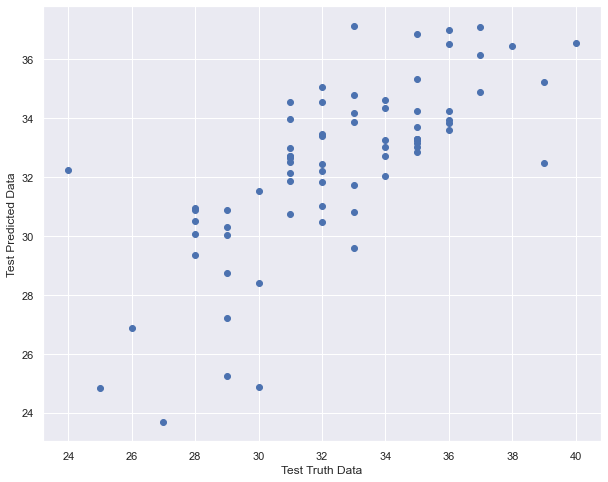

In [91]:
plt.scatter(y_test,reg_pred)    # try to chk linear distribution btw act and pred
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [92]:
# residuals     # errors should be normally distributed
residuals=y_test-reg_pred

In [93]:
residuals

24    -2.001257
6     -1.188465
153   -0.872702
211    1.969219
198    3.457093
         ...   
165    2.093883
154    1.290875
216   -2.941597
79     1.694277
29    -1.796474
Name: Temperature, Length: 74, dtype: float64

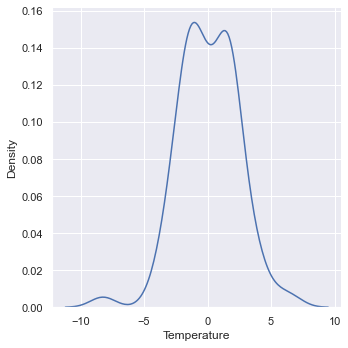

In [94]:
sns.displot(residuals,kind='kde')

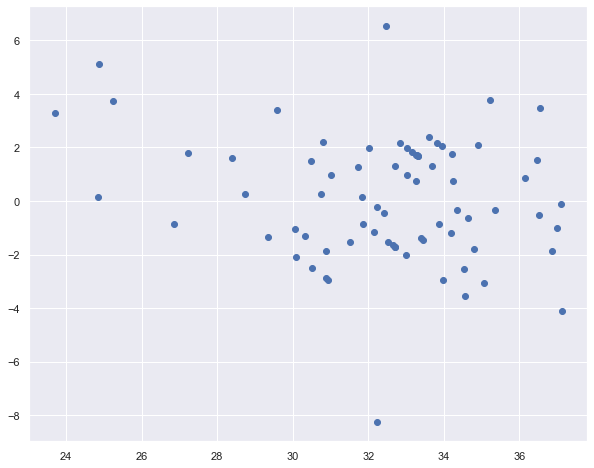

In [95]:
# Scatter plot with predictions and residuals
# uniform distribution 
plt.scatter(reg_pred,residuals)

## Performance Metrics

In [96]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.383982132743694
1.8628704871643713
2.320340951830936


## R square and Adjusted R square

In [98]:
# R Square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5071845188649484


In [100]:
# Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.41974951414743933

## Variance Inflation Factor (VIF)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [104]:
vif

,VIF Factor,features
0,28.848917,RH
1,37.120522,Ws
2,1.536591,Rain
3,43.801950,FFMC
4,204.687555,DMC
5,51.456654,DC
6,36.298071,ISI
7,412.902506,BUI
8,49.012021,FWI
9,6.495592,Classes


As VIF for BUI is very high we can drop that feature to avoid multicollinearity.

In [105]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558800,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.570483,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.029001,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322810,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686342,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874924,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740178,0.507122,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.908054,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857847,0.583882,0.087370
FWI,0.558800,-0.570483,0.029001,-0.322810,0.686342,0.874924,0.740178,0.908054,0.857847,1.000000,0.713695,0.192711


In [106]:
df1.drop('BUI',axis=1,inplace=True)

In [107]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0,0


In [118]:
# New Independent and Dependent Features
X1=df1.drop(['Temperature'],axis=1)
y1=df1['Temperature']

In [120]:
X1.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,region
0,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0,0


In [121]:
y1

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 42)

In [123]:
X_train.shape , y_train.shape

((170, 10), (170,))

In [124]:
X_test.shape, y_test.shape

((74, 10), (74,))

In [125]:
X_train = scaler.fit_transform(X_train)

In [126]:
X_test = scaler.transform(X_test)

### Model 2 : Using Ridge Regression

In [127]:
# Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [128]:
ridge.fit(X_train,y_train)

Ridge()

In [129]:
rid_pred = ridge.predict(X_test)

In [130]:
rid_pred

array([32.99458675, 34.11801625, 33.83552082, 33.05363485, 36.50340845,
       32.55927549, 35.17696954, 27.29741953, 30.92659089, 29.58682022,
       29.32461035, 33.40823432, 33.90626562, 33.34626245, 34.29776185,
       31.99899775, 36.95415715, 25.32933142, 32.14640987, 33.41374843,
       30.75789661, 28.38276462, 35.02266844, 28.72942213, 36.47019361,
       26.88568487, 32.7051863 , 33.28689982, 32.86344909, 34.53880991,
       34.53381249, 31.52649586, 32.6127751 , 33.38894937, 32.67720564,
       33.38992994, 30.23765837, 34.27853277, 31.69892585, 23.74946652,
       33.63217521, 33.69017118, 32.52696791, 24.92049841, 36.04898721,
       32.3632081 , 31.00326868, 30.51428727, 35.29972108, 34.52985565,
       37.02218202, 30.811506  , 30.76625805, 34.46240313, 33.78909055,
       32.36382444, 36.96318218, 32.24852336, 30.10281778, 36.51624808,
       32.97561538, 30.02551209, 33.8570317 , 31.84062391, 31.86704123,
       24.85774199, 33.13965507, 30.46342645, 36.80916324, 35.01

## Performance Metrics

In [131]:
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

5.318776057095739
1.8475134761223038
2.3062471803984366


## R square and Adjusted R square

In [132]:
# R Square
rid_score=r2_score(y_test,rid_pred)
print(rid_score)

0.5131530683049517


In [133]:
# Adjusted R square
#display adjusted R-squared
1 - (1-rid_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43587577755970597

In [134]:
# residuals     # errors should be normally distributed
residuals=y_test-rid_pred

In [135]:
residuals

24    -1.994587
6     -1.118016
153   -0.835521
211    1.946365
198    3.496592
         ...   
165    1.983672
154    1.316726
216   -2.928085
79     1.703533
29    -1.819435
Name: Temperature, Length: 74, dtype: float64

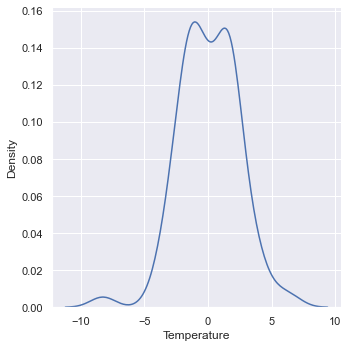

In [136]:
sns.displot(residuals,kind='kde')

In [137]:
vif1 = pd.DataFrame()
vif1['VIF Factor'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif1['features'] = X1.columns

In [138]:
vif1

,VIF Factor,features
0,28.848805,RH
1,37.111576,Ws
2,1.535589,Rain
3,43.523184,FFMC
4,28.622128,DMC
5,14.058046,DC
6,34.969712,ISI
7,46.326952,FWI
8,6.380838,Classes
9,3.021565,region


### Model 3 : Using Lasso Regression

In [139]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [140]:
lasso.fit(X_train,y_train)

Lasso()

In [141]:
lass_pred = lasso.predict(X_test)

In [142]:
lass_pred

array([32.74072579, 33.32187087, 33.54693021, 32.7082748 , 34.22983366,
       31.67752745, 34.09880725, 28.87679592, 30.94180031, 30.12014501,
       31.02960443, 32.42182319, 32.81087632, 32.32292102, 33.35029576,
       32.40852243, 34.60240311, 27.42655749, 32.21273113, 33.11128218,
       31.55623953, 29.791641  , 33.64953173, 30.34890369, 34.65269734,
       28.7696519 , 32.5136534 , 32.81120307, 33.03223631, 33.923199  ,
       33.24315174, 31.31741561, 32.74896763, 32.78193502, 32.59204579,
       32.76025534, 31.38484703, 33.33348532, 31.08495758, 28.32576203,
       32.79809198, 32.95098773, 32.64772568, 27.52545966, 34.26734355,
       32.4954834 , 31.78986745, 30.90110748, 34.24514746, 33.50033532,
       34.42932431, 31.75118767, 31.69012213, 32.92204643, 33.45004108,
       32.02602484, 34.93544961, 32.62131383, 31.11961127, 34.48046169,
       33.12238023, 31.1784741 , 33.28806033, 32.1686657 , 32.13251537,
       27.95942139, 33.0271774 , 31.58667746, 34.37533072, 34.15

## Performance Metrics

In [143]:
print(mean_squared_error(y_test,lass_pred))
print(mean_absolute_error(y_test,lass_pred))
print(np.sqrt(mean_squared_error(y_test,lass_pred)))

6.159199974421178
1.9952039311850904
2.4817735542190746


In [144]:
# print the coefficients and the intercept
print(lasso.coef_)

[-0.67315029 -0.         -0.          1.19451067  0.          0.
  0.          0.          0.          0.        ]


In [145]:
print(lasso.intercept_)

32.01764705882353


## R square and Adjusted R square

In [146]:
# R Square
lass_score=r2_score(y_test,lass_pred)
print(lass_score)

0.43622600819171975


In [147]:
# Adjusted R square
#display adjusted R-squared
1 - (1-lass_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3467380729840561

### Model 4 : Using ElasticNet

In [148]:
## Elastic Net
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [149]:
elastic.fit(X_train,y_train)

ElasticNet()

In [150]:
elast_pred = elastic.predict(X_test)

In [151]:
elast_pred

array([32.66957284, 33.27115172, 33.39745114, 32.58900623, 34.69439057,
       31.55488365, 34.21730294, 29.02560535, 30.69298968, 30.09686929,
       30.40503299, 32.22067347, 32.4709192 , 32.08758701, 33.83648656,
       32.23742841, 35.63826853, 27.89226261, 32.08782477, 32.92506961,
       31.00038258, 29.64034104, 33.68294987, 30.10998382, 35.3955719 ,
       28.88639177, 32.3550173 , 32.83600726, 32.71177382, 34.19519862,
       33.30952398, 31.19933269, 32.71046307, 33.03661115, 32.10032767,
       32.39148781, 30.81067065, 33.2751006 , 31.04327982, 28.01243659,
       32.77793715, 32.79114098, 32.19826519, 27.84606844, 34.7186451 ,
       32.37672089, 31.66613039, 30.72997798, 34.32921937, 33.59277888,
       35.63393825, 31.34551669, 31.53871676, 33.57373375, 33.62189839,
       32.22908515, 36.11523872, 32.00088501, 30.8525572 , 34.90498147,
       33.07852648, 30.7918561 , 33.48879134, 31.91148521, 31.71022672,
       28.01686877, 32.98332461, 31.32068256, 35.38585121, 34.15

## print the coefficients and the intercept

In [152]:
print(elastic.coef_)

[-0.70012322 -0.0955581  -0.00209238  0.8261929   0.12676714  0.
  0.23406215  0.17011667  0.06625314  0.        ]


In [153]:
print(elastic.intercept_)

32.01764705882353


## Performance Metrics

In [154]:
print(mean_squared_error(y_test,elast_pred))
print(mean_absolute_error(y_test,elast_pred))
print(np.sqrt(mean_squared_error(y_test,elast_pred)))

5.531308331030863
1.8635712258867112
2.351873366282901


## R square and Adjusted R square

In [155]:
# R Square
elast_score=r2_score(y_test,elast_pred)
print(elast_score)

0.493699215700376


In [157]:
## Adjusted R square
#display adjusted R-squared
1 - (1-elast_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.41333401184329277

## Comparing predicted values for all models

In [158]:
df_2 = pd.DataFrame({'Actual':y_test,'Lr':reg_pred,'Ridge':rid_pred,'Lasso':lass_pred,'ElasticNet':elast_pred})
df_2.head()

,Actual,Lr,Ridge,Lasso,ElasticNet
24,31,33.001257,32.994587,32.740726,32.669573
6,33,34.188465,34.118016,33.321871,33.271152
153,33,33.872702,33.835521,33.546930,33.397451
211,35,33.030781,33.053635,32.708275,32.589006
198,40,36.542907,36.503408,34.229834,34.694391


In [160]:
print(score,rid_score,lass_score,elast_score)

0.5071845188649484 0.5131530683049517 0.43622600819171975 0.493699215700376
